In [1]:
import napari
from napari.utils import nbscreenshot
import numpy as np
from skimage import draw

from morphometrics.utils.surface_utils import binary_mask_to_surface

In [2]:
# create an image with an ellispoid object
label_image = np.zeros((100, 100, 100), dtype=np.uint16)
label_image[19:82, 29:72, 29:72] = draw.ellipsoid(30, 20, 20)

In [3]:
# mesh the ellipsoid
mesh = binary_mask_to_surface(
    label_image,
    n_mesh_smoothing_interations=10
)

In [4]:
# create a napari viewer
viewer = napari.Viewer(ndisplay=3)

# add the image to the viewer
viewer.add_image(
    label_image,
    rendering="iso",
    iso_threshold=0,
    visible=False
)

# add the mesh to the viewer as a surface layer
# see the napari docs for information on the surface layer
# https://napari.org/howtos/layers/surface.html
viewer.add_surface(
    (mesh.vertices, mesh.faces, np.ones((len(mesh.vertices),)))
)

<Surface layer 'Surface' at 0x7fcefca6b580>

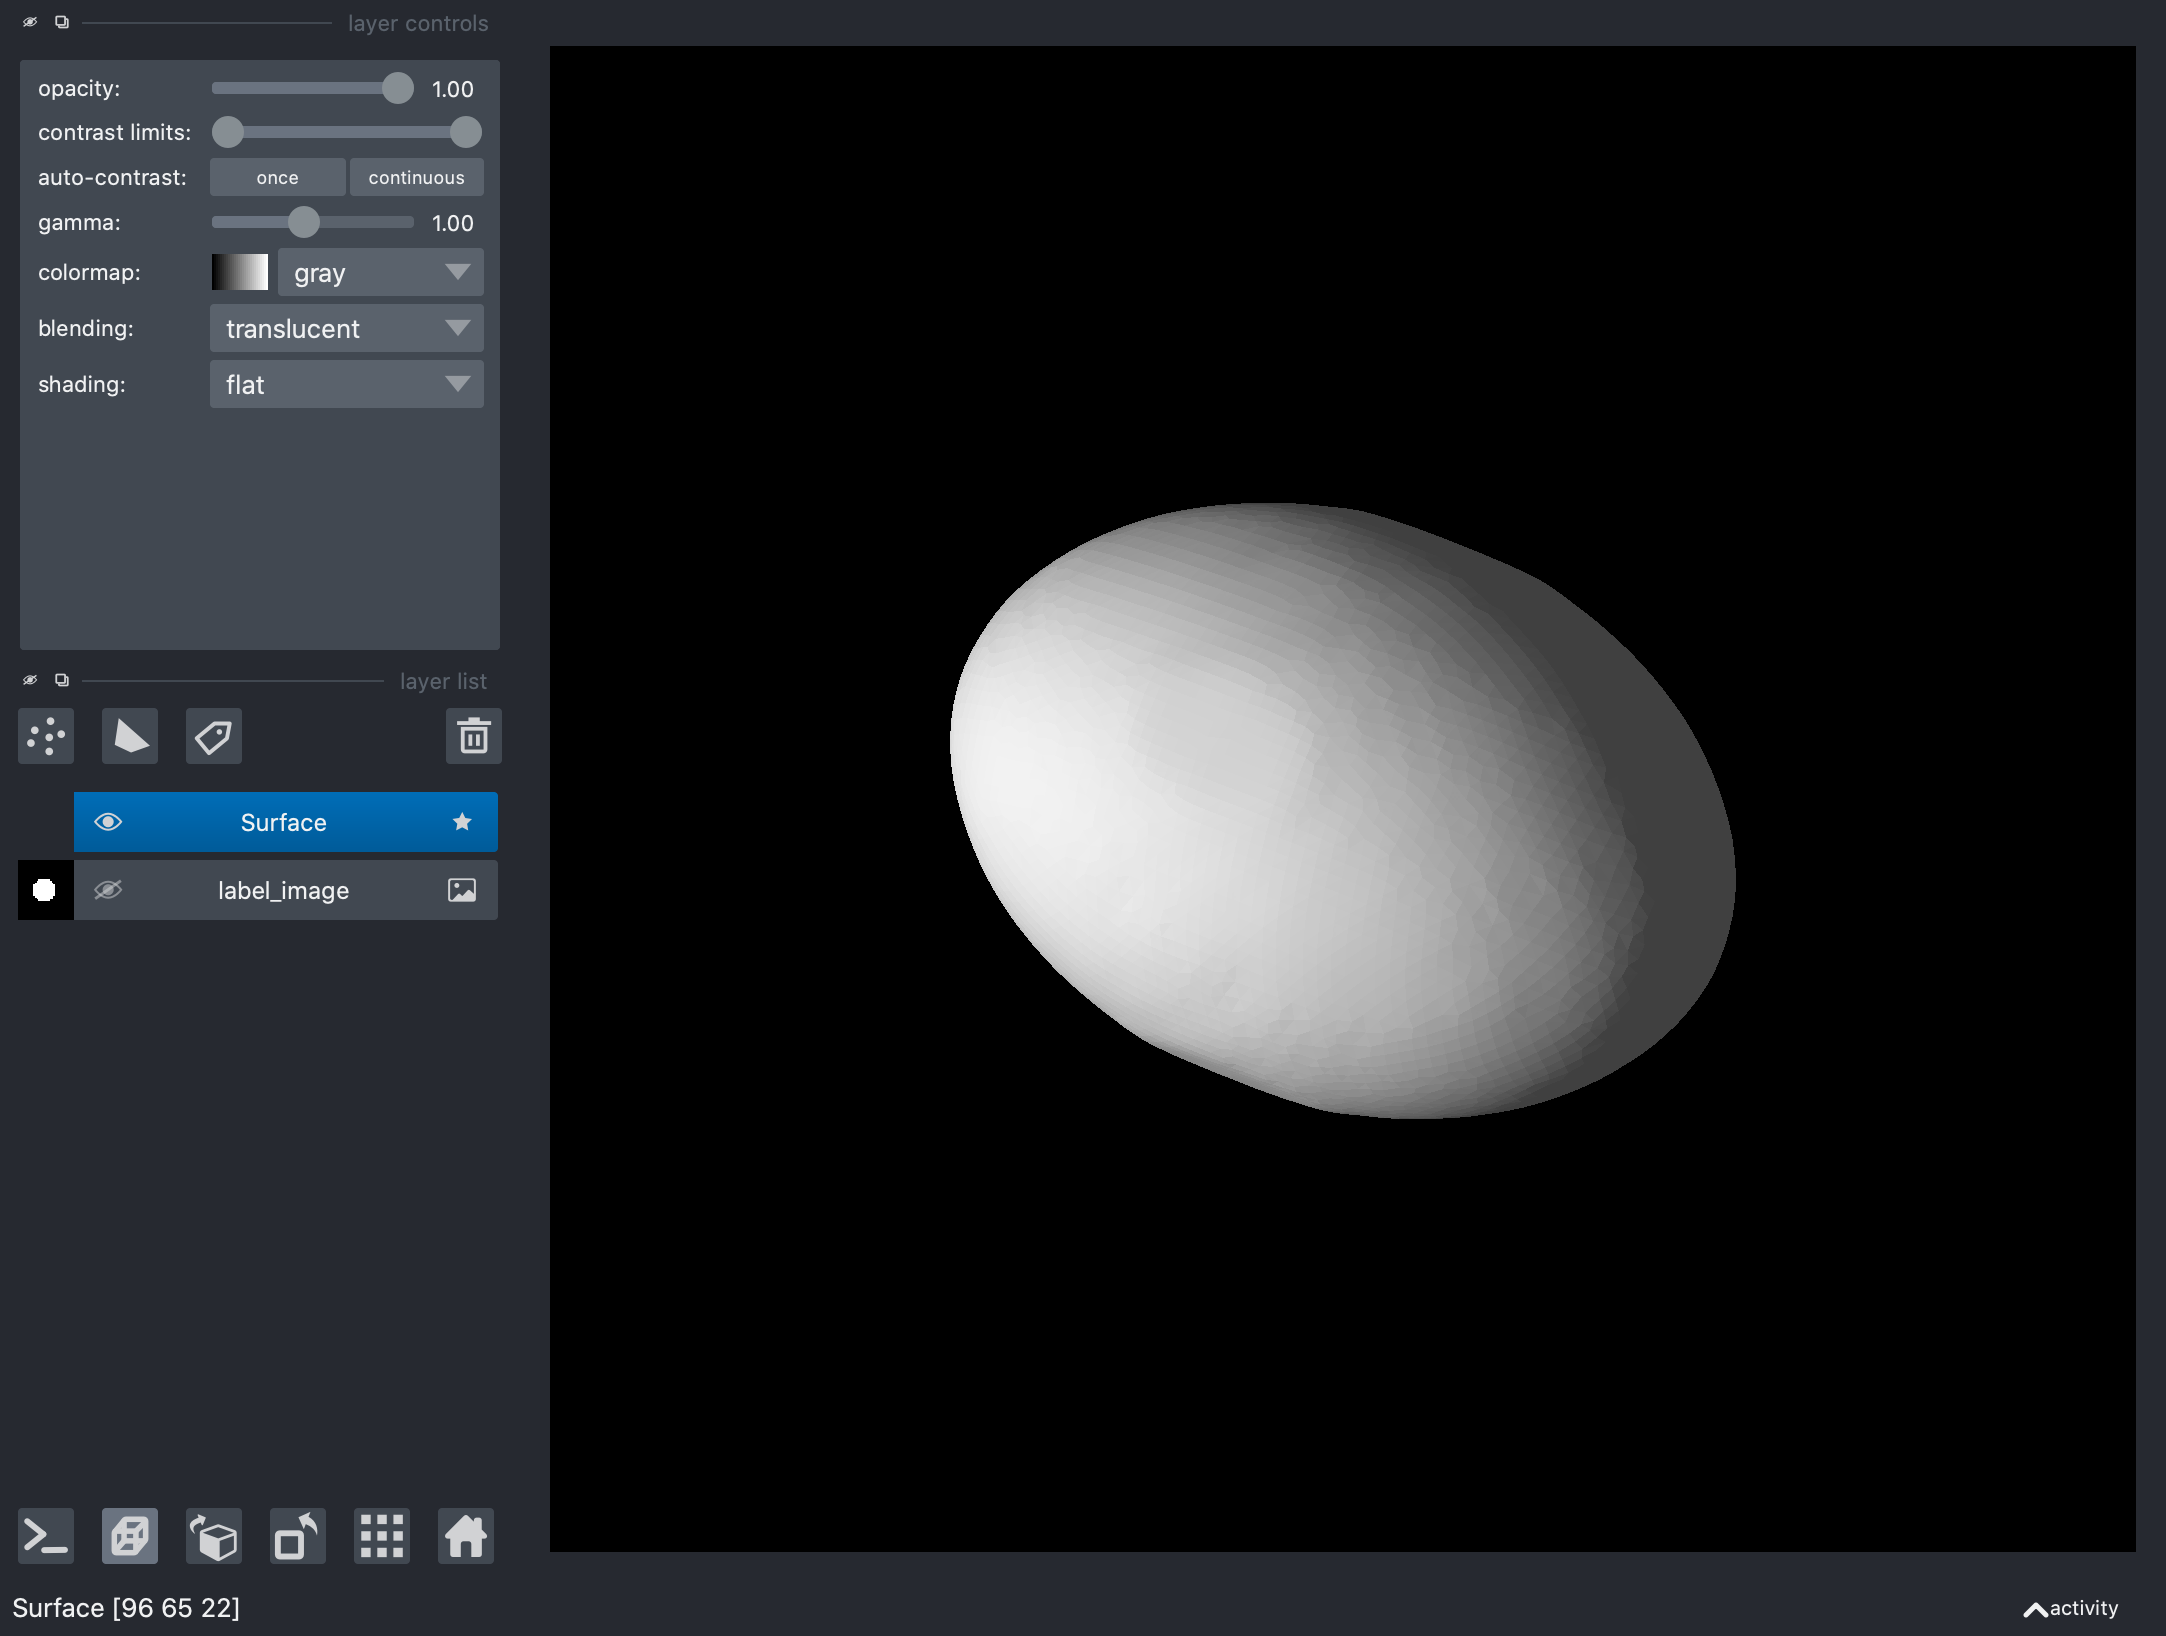

In [5]:
nbscreenshot(viewer)